<a href="https://colab.research.google.com/github/Himanshu0518/Machine-Learning/blob/main/13_Car_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso

In [ ]:
car_dataset = pd.read_csv('/content/cardekho.csv')
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [ ]:
car_dataset.shape

(8128, 12)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [ ]:
car_dataset.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [ ]:
car_dataset = car_dataset.dropna()

In [ ]:
car_dataset.isnull().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

In [ ]:
car_dataset['owner'].value_counts()

owner
First Owner             5215
Second Owner            2017
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: count, dtype: int64

In [ ]:
car_dataset['fuel'].value_counts()

fuel
Diesel    4299
Petrol    3520
CNG         53
LPG         35
Name: count, dtype: int64

In [ ]:
car_dataset['seller_type'].value_counts()

seller_type
Individual          6564
Dealer              1107
Trustmark Dealer     236
Name: count, dtype: int64

In [ ]:
car_dataset['transmission'].value_counts()

transmission
Manual       6866
Automatic    1041
Name: count, dtype: int64

In [ ]:
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.replace({'fuel':{'Petrol':0,'Diesel':1,'CNG':2,'LPG':3}},inplace=True)
car_dataset.replace({'seller_type':{'Dealer':0,'Individual':1,'Trustmark Dealer':2}},inplace=True)
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

In [ ]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,0,0,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,0,1,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,0,1,0,2,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,0,0,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,0,1,0,0,16.10,1298.0,88.2,5.0


In [ ]:
car_dataset = car_dataset.drop(columns=['name','max_power'],axis=1)

Splitting data  into trainning and test data

In [ ]:
X = car_dataset.drop(columns='selling_price',axis=1)
Y = car_dataset['selling_price']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)

In [ ]:
X.shape , X_train.shape , X_test.shape

((7907, 9), (7116, 9), (791, 9))

In [ ]:
X_train.dtypes

year                    int64
km_driven               int64
fuel                    int64
seller_type             int64
transmission            int64
owner                   int64
mileage(km/ltr/kg)    float64
engine                float64
seats                 float64
dtype: object

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
y_pred_train = model.predict(X_train)

In [ ]:
metrics.r2_score(Y_train,y_pred_train)

0.5770232769596182

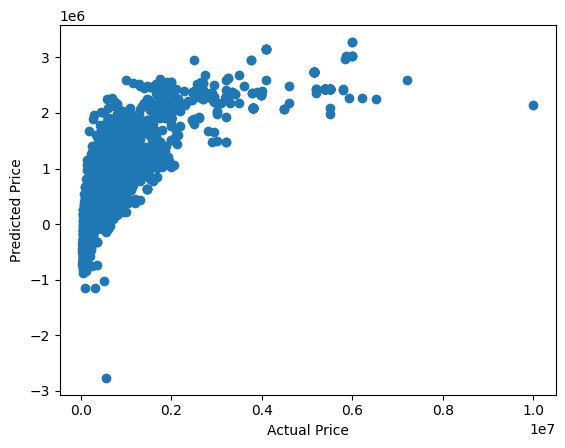

In [ ]:
plt.scatter(Y_train,y_pred_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

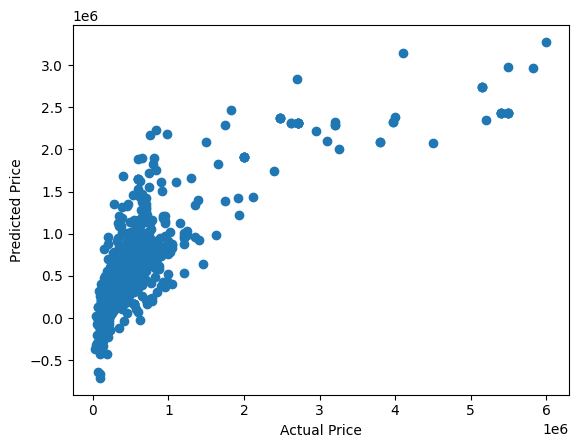

In [ ]:
y_pred_test = model.predict(X_test)
plt.scatter(Y_test,y_pred_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Lasso Regression

In [ ]:
classifier = Lasso()
classifier.fit(X_train,Y_train)

Lasso()

In [ ]:
Y_pred_train = classifier.predict(X_train)
metrics.r2_score(Y_train,Y_pred_train)

0.5770232769215127

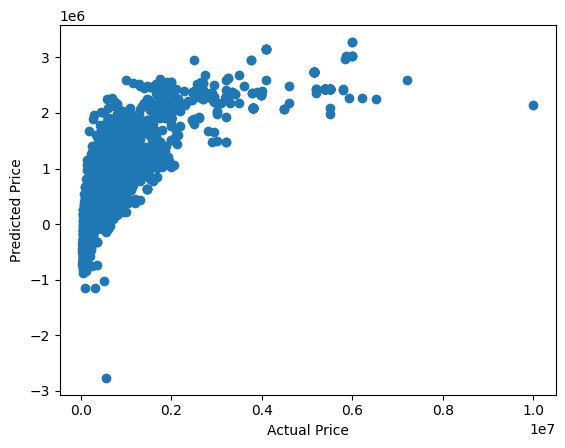

In [ ]:
plt.scatter(Y_train,Y_pred_train)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

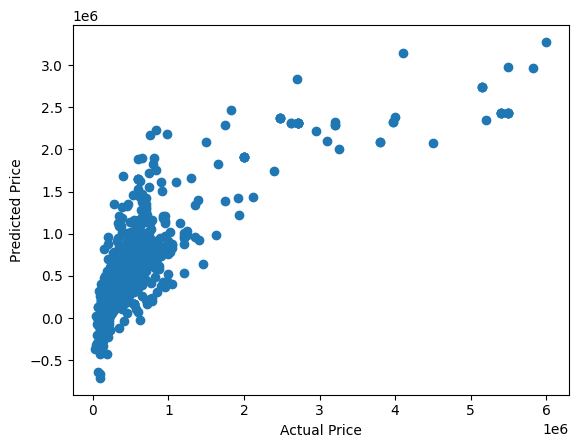

In [ ]:
y_pred_test = model.predict(X_test)
plt.scatter(Y_test,y_pred_test)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()